In [1]:
import streamlit as st
import pandas as pd
import tensorflow
from streamlit_option_menu import option_menu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

2022-11-26 10:31:20.516 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


In [42]:
model=tensorflow.keras.models.load_model("tcs_model2.h5")

In [43]:
def create_df(dataset,step):
    xxtrain,yytrain=[],[]
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        xxtrain.append(a)
        yytrain.append(dataset[i+step,0])
    return np.array(xxtrain),np.array(yytrain)

In [44]:
options = option_menu("Main Menu",["Home"], icons=['house','gear-fill',"envelope"], menu_icon="cast", default_index=0,orientation="horizontal")
st.title("STOCK MARKET FORECASTING")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [45]:
a=st.sidebar.selectbox("STOCKS",("Select the stock","TCS"))

In [46]:
# Reading Dataset
df=pd.read_csv("tcs_data2.csv")
st.dataframe(df)
   

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

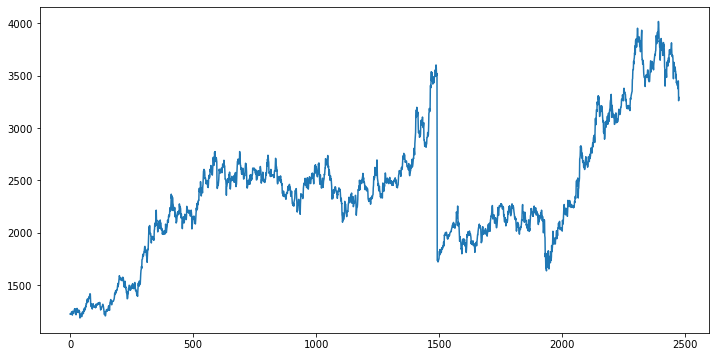

In [47]:
 # Plotting Close Price
st.subheader("closing price")
fig3=plt.figure(figsize=(12,6))
plt.plot(df.Close)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

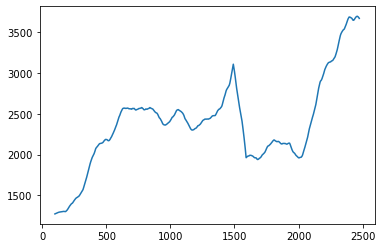

In [48]:
# Plotting Close Price with MA100
st.subheader("closing price with 100MA")
ma1_100=df.Close.rolling(100).mean()
plt.plot(ma1_100)
st.pyplot(fig3)

In [32]:
df_=pd.read_csv("tcs_data2.csv")
df_=df_["Close"] 

In [49]:
# Performing LOG & SCALING 
df_log=np.log(df_)
normalizing=MinMaxScaler(feature_range=(0,1))
df_norm=normalizing.fit_transform(np.array(df_log).reshape(-1,1))

In [50]:
t_s=100                            
df_x,df_y=create_df(df_norm, t_s)                                
fut_inp=df_y[2274:]
fut_inp=fut_inp.reshape(1,-1)   
temp_inp=list(fut_inp) 
temp_inp=temp_inp[0].tolist()

In [51]:
lst_out=[]   
n_steps=100
i=0  

In [52]:
st.subheader("How many days you want to forecast")
int_val_ = st.slider('Days', min_value=1, max_value=366, step=1)
   


In [53]:
int_val = st.number_input('Seconds', min_value=1, max_value=10, value=5, step=1)
while(i<int_val_):
    if(len(temp_inp)>100):
        fut_inp=np.array(temp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=model.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        temp_inp=temp_inp[1:]
        lst_out.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=model.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        lst_out.extend(yhat.tolist())
        i=i+1

In [54]:
lst_out=normalizing.inverse_transform(lst_out)
lst_out=np.exp(lst_out) 
st.dataframe(lst_out)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

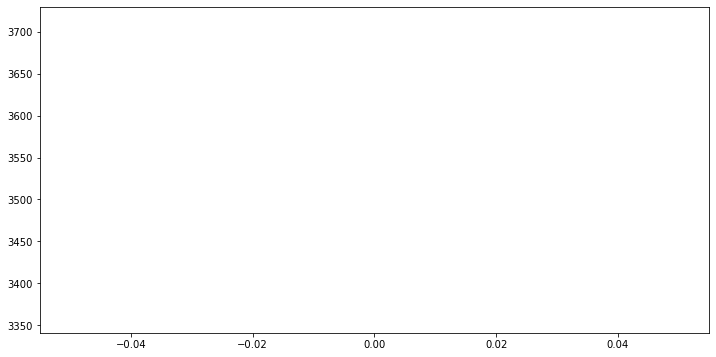

In [55]:
c=lst_out
fig4=plt.figure(figsize=(12,6))
plt.plot(c)
st.pyplot(fig4)